In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


# set the random seed - consistent
rs = 10

# load the data
#importing the data file and displaying the data types
df = pd.read_csv('D3.csv')

df[['Location', 'WindGustDir', 'WindDir9am', 
    'WindDir3pm', 'Cloud9am', 'Cloud3pm']] = df[['Location', 'WindGustDir', 'WindDir9am', 
                                                 'WindDir3pm', 'Cloud9am', 'Cloud3pm']].astype(str)

# drop Year
df.drop(['Year', 'Location', 'Month'], axis=1, inplace=True)

# one-hot encoding
df = pd.get_dummies(df)

# target/input split
y = df['RainTomorrow']
X = df.drop(['RainTomorrow'], axis=1)

#convert X from pandas Dataframe to numpy matrix for sklearn
X_mat = X.to_numpy()


# setting random state
rs = 10
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train, y_train)
X_test = scaler.transform(X_test)

In [3]:
from sklearn.neural_network import MLPClassifier

In [4]:
model_1 = MLPClassifier(random_state=rs)
model_1.fit(X_train, y_train)

print("Train accuracy:", model_1.score(X_train, y_train))
print("Test accuracy:", model_1.score(X_test, y_test))

y_pred = model_1.predict(X_test)
print(classification_report(y_test, y_pred))

print(model_1)

C:\Users\jbrai\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Train accuracy: 0.8872861691762177
Test accuracy: 0.835700557821216
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     33101
           1       0.67      0.53      0.59      9565

    accuracy                           0.84     42666
   macro avg       0.77      0.73      0.74     42666
weighted avg       0.83      0.84      0.83     42666

MLPClassifier(random_state=10)


In [5]:
# model_2 500 Iteration
model_2_low = MLPClassifier(max_iter=500, random_state=rs)
model_2_low.fit(X_train, y_train)

print("Train accuracy:", model_2_low.score(X_train, y_train))
print("Test accuracy:", model_2_low.score(X_test, y_test))

y_pred = model_2_low.predict(X_test)
print(classification_report(y_test, y_pred))

print(model_2_low)

Train accuracy: 0.888270569445421
Test accuracy: 0.8322317536211503
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     33101
           1       0.64      0.59      0.61      9565

    accuracy                           0.83     42666
   macro avg       0.76      0.75      0.75     42666
weighted avg       0.83      0.83      0.83     42666

MLPClassifier(max_iter=500, random_state=10)


In [6]:
# model_2 500 Iteration
model_2 = MLPClassifier(max_iter=300, random_state=rs)
model_2.fit(X_train, y_train)

print("Train accuracy:", model_2.score(X_train, y_train))
print("Test accuracy:", model_2.score(X_test, y_test))

y_pred = model_2.predict(X_test)
print(classification_report(y_test, y_pred))

print(model_2)

Train accuracy: 0.888270569445421
Test accuracy: 0.8322317536211503
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     33101
           1       0.64      0.59      0.61      9565

    accuracy                           0.83     42666
   macro avg       0.76      0.75      0.75     42666
weighted avg       0.83      0.83      0.83     42666

MLPClassifier(max_iter=300, random_state=10)


In [7]:
#Parameters of Default Model
print(model_1.get_params())

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 10, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


In [8]:
#Get Number of Layers
print(X_train.shape)

(99553, 80)


In [9]:
# these params nchanged based on 80 features seen above
# start tuning with one hidden layer of 5 to 80 neurons, increment of 5
params = {'hidden_layer_sizes': [(x,) for x in range(5, 81, 5)]}

cv_1 = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs),return_train_score=True, cv=10, n_jobs=-1)
cv_1.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=MLPClassifier(random_state=10), n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(5,), (10,), (15,), (20,),
                                                (25,), (30,), (35,), (40,),
                                                (45,), (50,), (55,), (60,),
                                                (65,), (70,), (75,), (80,)]},
             return_train_score=True)

In [10]:
result_set = cv_1.cv_results_
print(result_set)

{'mean_fit_time': array([ 31.53658662,  44.08159747,  91.51125269, 109.31030357,
       153.79319456, 181.47149506, 203.90680494, 223.75129881,
       254.46644485, 259.25341578, 287.28819933, 306.3980967 ,
       339.13054338, 339.78326025, 345.20791481, 286.63804448]), 'std_fit_time': array([ 5.33576093, 10.77367279, 16.96455555, 37.13956364, 24.45389445,
       28.29636827, 29.13178011, 32.38614796, 28.2513565 , 25.11770804,
       33.17618204, 16.58759276, 17.54365627, 14.18106914, 16.0461718 ,
       23.5723161 ]), 'mean_score_time': array([0.01170361, 0.01520553, 0.03580983, 0.04101045, 0.04191108,
       0.04090943, 0.0426101 , 0.05111244, 0.05691078, 0.05561247,
       0.06871517, 0.06051333, 0.07761781, 0.07891612, 0.06531882,
       0.02840638]), 'std_score_time': array([0.0029022 , 0.0034315 , 0.0094241 , 0.0077086 , 0.00918405,
       0.00620772, 0.00332741, 0.0118903 , 0.012107  , 0.0087789 ,
       0.01432185, 0.01551176, 0.01521781, 0.01273286, 0.01061444,
       0.00899

Total number of models:  16


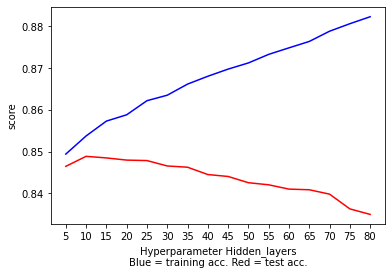

In [11]:
train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']
print("Total number of models: ", len(test_result))
# plot hidden layers hyperparameter values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter Hidden_layers\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),range(5, 81, 5))
plt.ylabel('score')
plt.show()

In [12]:
print("Train accuracy:", cv_1.score(X_train, y_train))
print("Test accuracy:", cv_1.score(X_test, y_test))

y_pred = cv_1.predict(X_test)
print(classification_report(y_test, y_pred))

print(cv_1.best_params_)

Train accuracy: 0.8533042700872902
Test accuracy: 0.8510289223269114
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     33101
           1       0.72      0.55      0.62      9565

    accuracy                           0.85     42666
   macro avg       0.80      0.74      0.76     42666
weighted avg       0.84      0.85      0.84     42666

{'hidden_layer_sizes': (10,)}


In [13]:
print("Train accuracy:", cv_1.score(X_train, y_train))
print("Test accuracy:", cv_1.score(X_test, y_test))

y_pred = cv_1.predict(X_test)
print(classification_report(y_test, y_pred))

print(cv_1.best_params_)

Train accuracy: 0.8533042700872902
Test accuracy: 0.8510289223269114
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     33101
           1       0.72      0.55      0.62      9565

    accuracy                           0.85     42666
   macro avg       0.80      0.74      0.76     42666
weighted avg       0.84      0.85      0.84     42666

{'hidden_layer_sizes': (10,)}


In [14]:
# new parameters
params = {'hidden_layer_sizes': [(8,),(10,),(11,),(13,)]}

cv_2 = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs,), cv=10, n_jobs=-1)
cv_2.fit(X_train, y_train)

print("Train accuracy:", cv_2.score(X_train, y_train))
print("Test accuracy:", cv_2.score(X_test, y_test))

y_pred = cv_2.predict(X_test)
print(classification_report(y_test, y_pred))

print(cv_2.best_params_)

Train accuracy: 0.8567094914266773
Test accuracy: 0.8503492242066282
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     33101
           1       0.72      0.54      0.62      9565

    accuracy                           0.85     42666
   macro avg       0.80      0.74      0.76     42666
weighted avg       0.84      0.85      0.84     42666

{'hidden_layer_sizes': (13,)}


In [15]:
# new parameters again as top model in first instance
params = {'hidden_layer_sizes': [(10,),(11,),(13,),(16,),(19,)]}

cv_2_new = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
cv_2_new.fit(X_train, y_train)

print("Train accuracy:", cv_2_new.score(X_train, y_train))
print("Test accuracy:", cv_2_new.score(X_test, y_test))

y_pred = cv_2_new.predict(X_test)
print(classification_report(y_test, y_pred))

print(cv_2_new.best_params_)

Train accuracy: 0.8567094914266773
Test accuracy: 0.8503492242066282
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     33101
           1       0.72      0.54      0.62      9565

    accuracy                           0.85     42666
   macro avg       0.80      0.74      0.76     42666
weighted avg       0.84      0.85      0.84     42666

{'hidden_layer_sizes': (13,)}


In [16]:
# Tuning alpha, the second hyperparameter
params = {'hidden_layer_sizes': [(10,),(13,),(16,),(19,)], 'alpha': [0.01, 0.001, 0.0001, 0.00001]}

cv_3 = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
cv_3.fit(X_train, y_train)

print("Train accuracy:", cv_3.score(X_train, y_train))
print("Test accuracy:", cv_3.score(X_test, y_test))

y_pred = cv_3.predict(X_test)
print(classification_report(y_test, y_pred))

print(cv_3.best_params_)

Train accuracy: 0.8581760469297761
Test accuracy: 0.8504429756714948
              precision    recall  f1-score   support

           0       0.87      0.94      0.91     33101
           1       0.73      0.53      0.61      9565

    accuracy                           0.85     42666
   macro avg       0.80      0.74      0.76     42666
weighted avg       0.84      0.85      0.84     42666

{'alpha': 0.01, 'hidden_layer_sizes': (19,)}


In [17]:
# Tuning alpha, the second hyperparameter as top of range
params = {'hidden_layer_sizes': [(16,),(19,),(21,),(23,),(25,)], 'alpha': [0.01, 0.001, 0.0001, 0.00001]}

cv_3_new = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
cv_3_new.fit(X_train, y_train)

print("Train accuracy:", cv_3_new.score(X_train, y_train))
print("Test accuracy:", cv_3_new.score(X_test, y_test))

y_pred = cv_3_new.predict(X_test)
print(classification_report(y_test, y_pred))

print(cv_3_new.best_params_)

Train accuracy: 0.8581760469297761
Test accuracy: 0.8504429756714948
              precision    recall  f1-score   support

           0       0.87      0.94      0.91     33101
           1       0.73      0.53      0.61      9565

    accuracy                           0.85     42666
   macro avg       0.80      0.74      0.76     42666
weighted avg       0.84      0.85      0.84     42666

{'alpha': 0.01, 'hidden_layer_sizes': (19,)}


In [18]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

In [19]:
# output the parameters of CV_1, CV_2, CV_3, or after RFE with LR or DT......choose based on highest test accuracy
print(cv_3.get_params(deep=True))

{'cv': 10, 'error_score': nan, 'estimator__activation': 'relu', 'estimator__alpha': 0.0001, 'estimator__batch_size': 'auto', 'estimator__beta_1': 0.9, 'estimator__beta_2': 0.999, 'estimator__early_stopping': False, 'estimator__epsilon': 1e-08, 'estimator__hidden_layer_sizes': (100,), 'estimator__learning_rate': 'constant', 'estimator__learning_rate_init': 0.001, 'estimator__max_fun': 15000, 'estimator__max_iter': 200, 'estimator__momentum': 0.9, 'estimator__n_iter_no_change': 10, 'estimator__nesterovs_momentum': True, 'estimator__power_t': 0.5, 'estimator__random_state': 10, 'estimator__shuffle': True, 'estimator__solver': 'adam', 'estimator__tol': 0.0001, 'estimator__validation_fraction': 0.1, 'estimator__verbose': False, 'estimator__warm_start': False, 'estimator': MLPClassifier(random_state=10), 'n_jobs': -1, 'param_grid': {'hidden_layer_sizes': [(10,), (13,), (16,), (19,)], 'alpha': [0.01, 0.001, 0.0001, 1e-05]}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': Fals

In [20]:
import pickle
with open('CS.pickle', 'rb') as f:
    dt_best,roc_index_dt_cv, fpr_dt_cv, tpr_dt_cv = pickle.load(f)

print(dt_best.best_params_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 45}


C:\Users\jbrai\Anaconda3\lib\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\jbrai\Anaconda3\lib\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator GridSearchCV from version 1.0 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [21]:
from dm_tools import analyse_feature_importance

analyse_feature_importance(dt_best.best_estimator_, X.columns)

Humidity3pm : 0.5886507349443689
Rainfall : 0.09856851752150844
Pressure3pm : 0.07938239434915402
WindGustSpeed : 0.0771197598018945
Sunshine : 0.06917439105416191
MinTemp : 0.014460088635201861
Humidity9am : 0.014201940390590338
MaxTemp : 0.011847631714827738
Temp3pm : 0.008682004315862546
Pressure9am : 0.007922214529194511
Temp9am : 0.00745645193836812
WindSpeed3pm : 0.007338933427116175
WindSpeed9am : 0.0027630783284189183
Evaporation : 0.0027362588075211104
WindDir3pm_N : 0.002303431220597595
Cloud3pm_8 : 0.001755270488763307
WindDir9am_N : 0.0013885204950639394
WindDir9am_NNE : 0.0011073150514016104
WindGustDir_NE : 0.0010780886936541934
WindDir3pm_NNW : 0.0008959354620227835


In [22]:
from sklearn.feature_selection import SelectFromModel

selectmodel = SelectFromModel(dt_best.best_estimator_, prefit=True)
X_train_sel_model = selectmodel.transform(X_train)
X_test_sel_model = selectmodel.transform(X_test)

print(X_train_sel_model.shape)

(99553, 7)


In [23]:
params = {'hidden_layer_sizes': [(10,),(13,),(16,),(19,)], 'alpha': [0.1, 0.01, 0.001,0.00001]}

cv_sel_model = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs,max_iter=700), cv=10, n_jobs=-1)
cv_sel_model.fit(X_train_sel_model, y_train)

print("Train accuracy:", cv_sel_model.score(X_train_sel_model, y_train))
print("Test accuracy:", cv_sel_model.score(X_test_sel_model, y_test))

y_pred = cv_sel_model.predict(X_test_sel_model)
print(classification_report(y_test, y_pred))

print(cv_sel_model.best_params_)

Train accuracy: 0.8464034233021607
Test accuracy: 0.8473726151971125
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     33101
           1       0.74      0.49      0.59      9565

    accuracy                           0.85     42666
   macro avg       0.80      0.72      0.75     42666
weighted avg       0.84      0.85      0.84     42666

{'alpha': 1e-05, 'hidden_layer_sizes': (19,)}


In [24]:
# output the parameters
print(cv_sel_model.get_params(deep=True))

{'cv': 10, 'error_score': nan, 'estimator__activation': 'relu', 'estimator__alpha': 0.0001, 'estimator__batch_size': 'auto', 'estimator__beta_1': 0.9, 'estimator__beta_2': 0.999, 'estimator__early_stopping': False, 'estimator__epsilon': 1e-08, 'estimator__hidden_layer_sizes': (100,), 'estimator__learning_rate': 'constant', 'estimator__learning_rate_init': 0.001, 'estimator__max_fun': 15000, 'estimator__max_iter': 700, 'estimator__momentum': 0.9, 'estimator__n_iter_no_change': 10, 'estimator__nesterovs_momentum': True, 'estimator__power_t': 0.5, 'estimator__random_state': 10, 'estimator__shuffle': True, 'estimator__solver': 'adam', 'estimator__tol': 0.0001, 'estimator__validation_fraction': 0.1, 'estimator__verbose': False, 'estimator__warm_start': False, 'estimator': MLPClassifier(max_iter=700, random_state=10), 'n_jobs': -1, 'param_grid': {'hidden_layer_sizes': [(10,), (13,), (16,), (19,)], 'alpha': [0.1, 0.01, 0.001, 1e-05]}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_s

In [25]:
from sklearn.metrics import roc_auc_score

y_pred_proba_nn_1 = model_1.predict_proba(X_test)
y_pred_proba_nn_2 = model_2.predict_proba(X_test)
y_pred_proba_cv_1 = cv_1.predict_proba(X_test)
y_pred_proba_cv_2 = cv_2.predict_proba(X_test)
y_pred_proba_cv_2_new = cv_2_new.predict_proba(X_test)
y_pred_proba_cv_3 = cv_3.predict_proba(X_test)
y_pred_proba_cv_3_new = cv_3_new.predict_proba(X_test)
y_pred_proba_cv_sel_model = cv_sel_model.predict_proba(X_test_sel_model)


roc_index_nn_1 = roc_auc_score(y_test, y_pred_proba_nn_1[:, 1])
roc_index_nn_2 = roc_auc_score(y_test, y_pred_proba_nn_2[:, 1])
roc_index_cv_1 = roc_auc_score(y_test, y_pred_proba_cv_1[:, 1])
roc_index_cv_2 = roc_auc_score(y_test, y_pred_proba_cv_2[:, 1])
roc_index_cv_2_new = roc_auc_score(y_test, y_pred_proba_cv_2_new[:, 1])
roc_index_cv_3 = roc_auc_score(y_test, y_pred_proba_cv_3[:, 1])
roc_index_cv_3_new = roc_auc_score(y_test, y_pred_proba_cv_3_new[:, 1])
roc_index_cv_sel_model = roc_auc_score(y_test, y_pred_proba_cv_sel_model[:, 1])


print("ROC index on test for NN_default:", roc_index_nn_1)
print("ROC index on test for NN with relu:", roc_index_nn_2)
print("ROC index on test for NN with gridsearch 1:", roc_index_cv_1)
print("ROC index on test for NN with gridsearch 2:", roc_index_cv_2)
print("ROC index on test for NN with gridsearch 2 new:", roc_index_cv_2_new)
print("ROC index on test for NN with gridsearch 3:", roc_index_cv_3)
print("ROC index on test for NN with gridsearch 3 new:", roc_index_cv_3_new)
print("ROC index on test for NN with feature selection (model selection) and gridsearch:", roc_index_cv_sel_model)

from sklearn.metrics import roc_curve

fpr_nn_1, tpr_nn_1, thresholds_nn_1 = roc_curve(y_test, y_pred_proba_nn_1[:,1])
fpr_nn_2, tpr_nn_2, thresholds_nn_2 = roc_curve(y_test, y_pred_proba_nn_2[:,1])
fpr_cv_1, tpr_cv_1, thresholds_cv_1 = roc_curve(y_test, y_pred_proba_cv_1[:,1])
fpr_cv_2, tpr_cv_2, thresholds_cv_2 = roc_curve(y_test, y_pred_proba_cv_2[:,1])
fpr_cv_2_new, tpr_cv_2_new, thresholds_cv_2_new = roc_curve(y_test, y_pred_proba_cv_2_new[:,1])
fpr_cv_3, tpr_cv_3, thresholds_cv_3 = roc_curve(y_test, y_pred_proba_cv_3[:,1])
fpr_cv_3_new, tpr_cv_3_new, thresholds_cv_3_new = roc_curve(y_test, y_pred_proba_cv_3_new[:,1])
fpr_cv_sel_model, tpr_cv_sel_model, thresholds_cv_sel_model = roc_curve(y_test, y_pred_proba_cv_sel_model[:,1])

ROC index on test for NN_default: 0.8528102594898256
ROC index on test for NN with relu: 0.8565937501268315
ROC index on test for NN with gridsearch 1: 0.8777964519338578
ROC index on test for NN with gridsearch 2: 0.8797321044354529
ROC index on test for NN with gridsearch 2 new: 0.8797321044354529
ROC index on test for NN with gridsearch 3: 0.8788900507946555
ROC index on test for NN with gridsearch 3 new: 0.8788900507946555
ROC index on test for NN with feature selection (model selection) and gridsearch: 0.8684267162298955


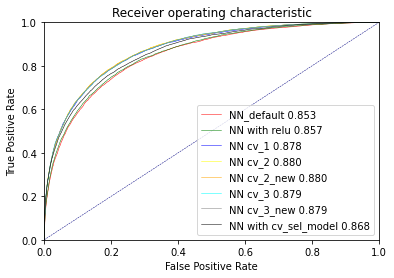

In [26]:
import matplotlib.pyplot as plt

plt.plot(fpr_nn_1, tpr_nn_1, label='NN_default {:.3f}'.format(roc_index_nn_1), color='red', lw=0.5)
plt.plot(fpr_nn_2, tpr_nn_2, label='NN with relu {:.3f}'.format(roc_index_nn_2), color='green', lw=0.5)
plt.plot(fpr_cv_1, tpr_cv_1, label='NN cv_1 {:.3f}'.format(roc_index_cv_1), color='blue', lw=0.5)
plt.plot(fpr_cv_2, tpr_cv_2, label='NN cv_2 {:.3f}'.format(roc_index_cv_2), color='yellow', lw=0.5)
plt.plot(fpr_cv_2_new, tpr_cv_2_new, label='NN cv_2_new {:.3f}'.format(roc_index_cv_2_new), color='orange', lw=0.5)
plt.plot(fpr_cv_3, tpr_cv_3, label='NN cv_3 {:.3f}'.format(roc_index_cv_3), color='cyan', lw=0.5)
plt.plot(fpr_cv_3_new, tpr_cv_3_new, label='NN cv_3_new {:.3f}'.format(roc_index_cv_3_new), color='gray', lw=0.5)
plt.plot(fpr_cv_sel_model, tpr_cv_sel_model, label='NN with cv_sel_model {:.3f}'.format(roc_index_cv_sel_model), color='black', lw=0.5)


plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

C:\Users\jbrai\Anaconda3\lib\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\jbrai\Anaconda3\lib\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator GridSearchCV from version 1.0 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\jbrai\Anaconda3\lib\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


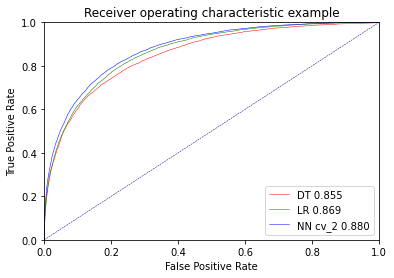

In [27]:
import pickle
with open('CS.pickle', 'rb') as f:
    dt_best,roc_index_dt_cv, fpr_dt_cv, tpr_dt_cv = pickle.load(f)
with open('LR.pickle', 'rb') as f:
    lr_best,roc_index_lr_cv, fpr_lr_cv, tpr_lr_cv = pickle.load(f)   
    

plt.plot(fpr_dt_cv, tpr_dt_cv, label='DT {:.3f}'.format(roc_index_dt_cv), color='red', lw=0.5)
plt.plot(fpr_lr_cv, tpr_lr_cv, label='LR {:.3f}'.format(roc_index_lr_cv), color='green', lw=0.5)
plt.plot(fpr_cv_2, tpr_cv_2, label='NN cv_2 {:.3f}'.format(roc_index_cv_2), color='blue', lw=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show() 